In [195]:
from lightkurve import TessTargetPixelFile
from lightkurve.correctors import PLDCorrector
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
import numpy as np

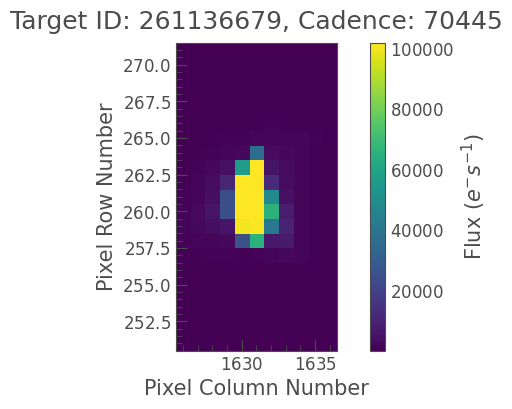

In [196]:
pixelfile = TessTargetPixelFile('/home/cpp/Área de Trabalho/luz_p/probabilidade/stars/MAST_2025-07-10T0006/TESS/tess2018206045859-s0001-0000000261136679-0120-s/tess2018206045859-s0001-0000000261136679-0120-s_tp.fits')
pixelfile.plot()
plt.show()

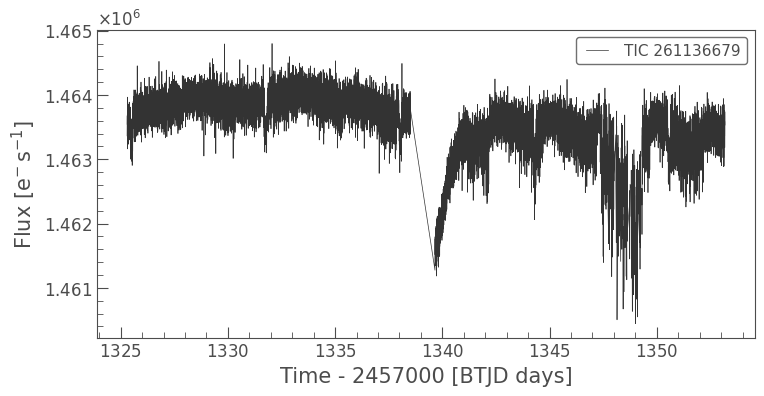

In [197]:
# apliciar uma mascara e corrigir a curva de luz
# a máscara pode ser criada com base em um limiar de desvio padrão dos valores de fluxo
# ou desenhada manualmente
# ou usando uma máscara pré-definida (pipeline mask)
# ou usando uma máscara manual (você desenha uma forma, como um círculo ou polígono, selecionando pixels "à mão")
# ou usando uma máscara de threshold (limiar) de desvio padrão dos valores de fluxo
mask = pixelfile.create_threshold_mask(threshold=3)
# o pld (PLDCorrector) é um corretor de curva de luz que usa o método de correção de polinômios locais
# ele corrige a curva de luz usando uma máscara de pixels
# o método PLDCorrector é usado para corrigir a curva de luz usando polinômios locais
# o método correct() retorna a curva de luz corrigida
pld = PLDCorrector(pixelfile, aperture_mask=mask)
lc = pld.correct()
lc.plot()
plt.show()

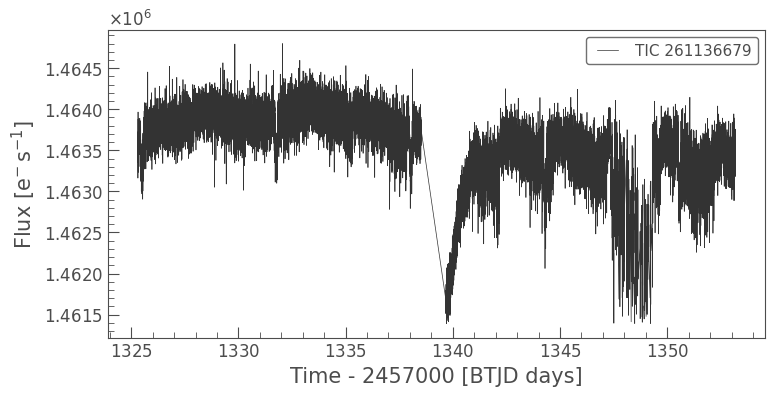

In [198]:
# remocao de outliers
lc = lc.remove_outliers(sigma=5)
lc.plot()
plt.show()

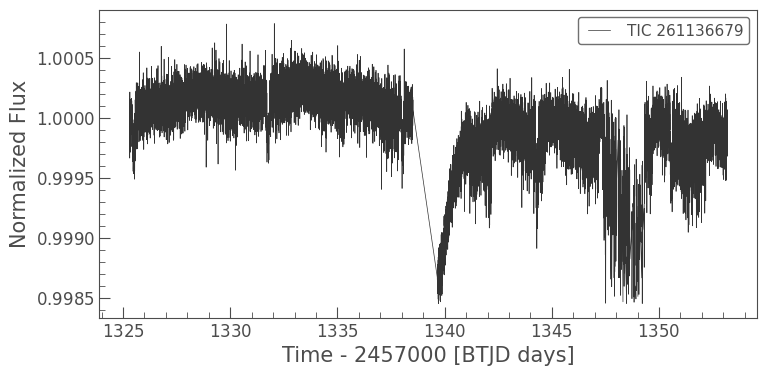

In [199]:
lc_norm = lc.normalize()
lc_norm.plot()
plt.show()

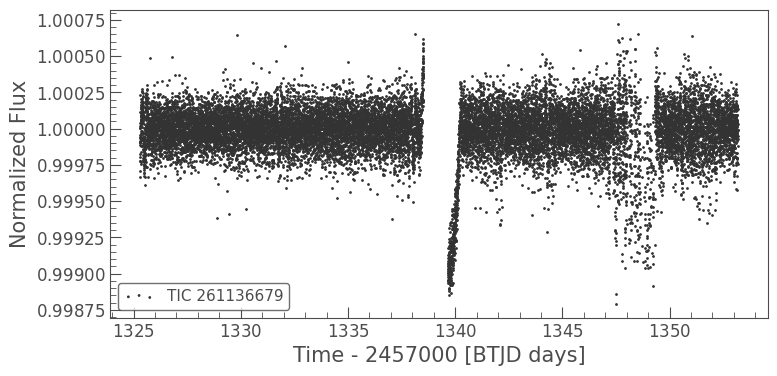

In [200]:
flat_lc = lc.flatten(window_length=301, break_tolerance=None)
flat_lc.scatter()
plt.show()

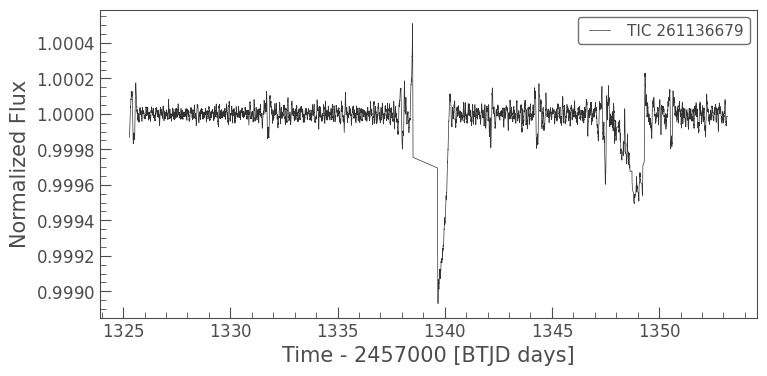

In [201]:
flat_lc.flux = savgol_filter(flat_lc.flux, window_length=51, polyorder=2)
flat_lc.plot()
plt.show()

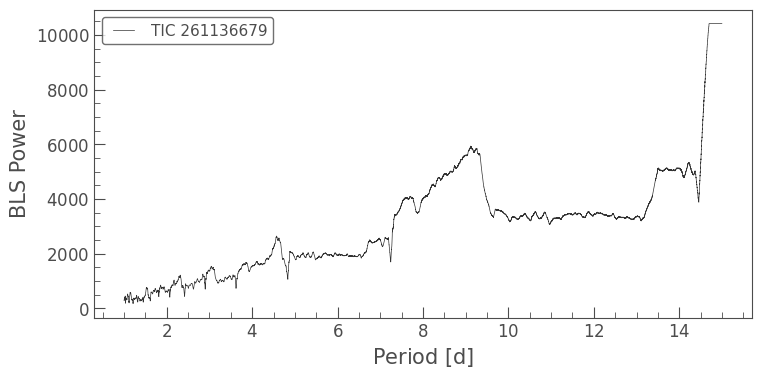

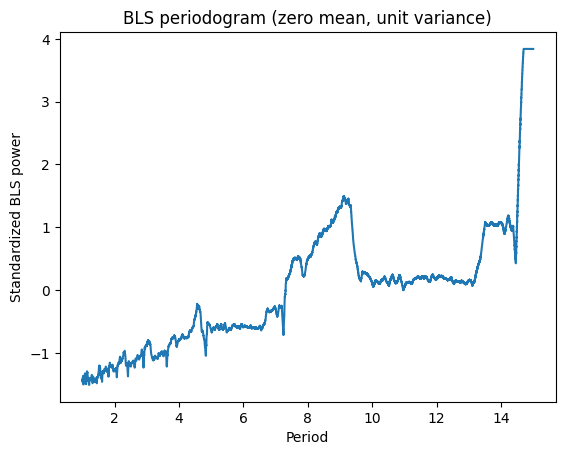

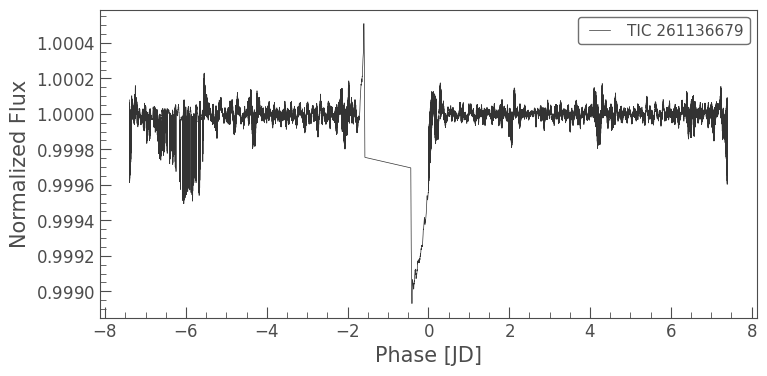

In [202]:
periodogram = flat_lc.to_periodogram(method='bls', period=np.arange(1, 15, 0.001))
periodogram.plot()
plt.show()

power = periodogram.power
power_std = (power - np.mean(power)) / np.std(power)

# 3. plot
plt.plot(periodogram.period, power_std)
plt.xlabel('Period')
plt.ylabel('Standardized BLS power')
plt.title('BLS periodogram (zero mean, unit variance)')
plt.show()

best_period = periodogram.period_at_max_power
folded = flat_lc.fold(period=best_period)
folded.plot()
plt.show()

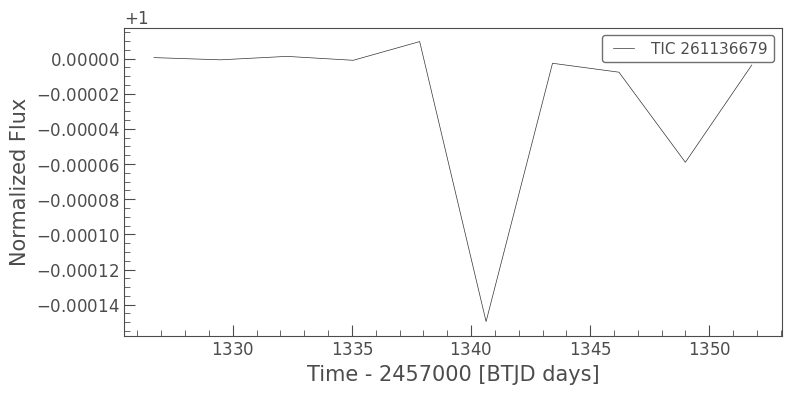

In [203]:
binned = flat_lc.bin(bins=10)
binned.plot()
plt.show()